Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Rea Rustagi"

---

In [2]:
%matplotlib inline
%precision 16
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project.

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Problem Description
* Problem Justification
* Description of Computational components needed to address problem
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained.

The project is worth about 2 problem sets and should be of comparable length or less (please: I will have 120 of these to read and I am not expecting full papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Problem Description [20 pts]

Briefly describe the general problem you want to solve and the goals you hope to achieve

Urban sprawl has widely been identified as a major environmental issue for a host of reasons, and it has been a large contributer to the changing landscape in New Jersey in particular, as suburbs are ubiquitous in this region. Many existing suburbs were created as a result of unsupervised urban expansion, rather than deliberate planning. As a result, many suburban communities were formed in proximity to major highways and established through strip development, which increases auto dependency, fragments rural land, and diminishes community vitality. Automobile commuting contributes greatly to suburban energy use and emissions. Other issues include resource wastage and destructon of biodiversity.

However, it is often difficult on a macroscopic scale to determine the scale of urban/suburban expansion. Numerical methods have been identified as helpful tools for quanitfying the extent of urban sprawl in other locations, such as in post-Soviet Russian cities in Poghosyan 2017. In this project, I aim to use Principal Component Analysis (PCA) on LANDSAT 7 images of Central New Jersey from 1999 and 2020 to perform an analysis of changes in land usage during this period.

I hope that this analysis will lend itself to a clearer understanding of the scope of urban sprawl in this region, so as to inform policy decisions regarding zoning and residential development, as well as increase awareness of the issue. 

## Problem Justification [10 pts]

Briefly describe why this problem is important to you,  and, if possible, to anyone else.

I grew up in an area of central New Jersey that was largely rural when my parents settled there in 1992. My town, Hillsborough, has experienced rapid development in the last three decades, with a great deal of agricultural land being developed for various residential projects. A similar transformation has occurred throughout the county and in surrounding counties, as many have settled in the area to take advantage of good school systems and access to both New York City and Philadelphia. So, this problem is particularly important to me because urban sprawl has drastically changed the landscape of my hometown. This is additionally a matter of importance to others interested in the environmental impact of urban sprawl, as defining the scope of the issue is often the first step in developing an effective and holistic plan to mitigate negative effects. 

## Numerical Methods [10 pts]

Briefly describe the specific approach you will take to solve some concrete aspect of the general problem including the numerical or computational methods you intend to use.  These can include methods we did not discuss in class but provide some reference to the method. You do not need to explain how the methods work, but you should briefly justify your choices.

As I previously mentioned, I will be utilizing PCA to perform a visual analysis of the LANDSAT data from 1999 and 2020. PCA is an effective tool for visual data compression, which will reduce confusing natural color images of the aerial landscape into high contrast "zones." Therefore, it will become much easier to visually identify changes that have taken place during the 1999-2020 timeframe. 

I will be following the approach of Santhosh Kumar's PCA image analysis to additionally explore the fidelity of PCA in information retention. This project explores a step by step PCA implementation, which I will validate with a scikitlearn PCA implementation. 

## Implementation [40 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first code block will be a grading cell but feel free to add (not copy) cells in this section to organize your work. 

For at least one routine you code below, you should provide a test block (e.g. that implements `numpy.testing` routines) to validate your code.

The inputs for this project are LANDSAT 7 packets taken from https://earthexplorer.usgs.gov/. For our purposes, we will only be extracting 6 bands from the entire data packet. These bands are described as follows:
<table width="80%">
    <tr align="center"><th>Band</th> <th align="center">Description</th></tr>
     <tr align="center"><td>1</td> <td align="center">Blue</td> </tr>
     <tr align="center"><td>2</td> <td align="center">Green</td> </tr>
     <tr align="center"><td>3</td> <td align="center">Red</td> </tr>
     <tr align="center"><td>4</td> <td align="center">Near Infrared</td> </tr>
     <tr align="center"><td>5</td> <td align="center">Shortwave Infrared</td> </tr>
     <tr align="center"><td>6</td> <td align="center">Thermal</td> </tr>
</table>
The packets used here were taken from August 1999 and June 2000. First, we will load the band images in as arrays.

(-0.5, 967.5, 847.5, -0.5)

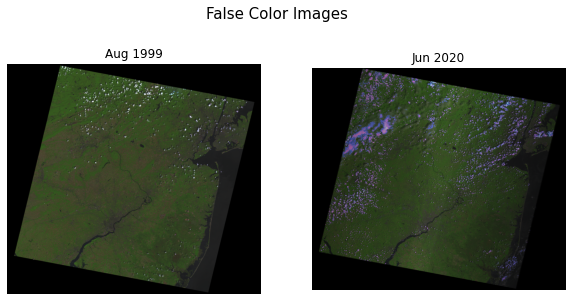

In [3]:
from IPython.display import Image, display
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np

# False Color mapping RGB = 5,4,3 for better contrast
red1 = Image.open("1999band5.jpg").convert('L')
green1 = Image.open("1999band4.jpg").convert('L')
blue1 = Image.open("1999band3.jpg").convert('L')

red2 = Image.open("2020band5.jpg").convert('L')
green2 = Image.open("2020band4.jpg").convert('L')
blue2 = Image.open("2020band3.jpg").convert('L')

merge1 = Image.merge("RGB", (red1, green1, blue1))
merge2 = Image.merge("RGB", (red2, green2, blue2))

img1 = np.array(merge1)
img2 = np.array(merge2)
img_shape1 = img1.shape[:2]
img_shape2 = img2.shape[:2]

# Landsat 7 has 6 bands given in their GEOTIFF package
n_bands = 6

NJ_img1999 = np.zeros((img_shape1[0], img_shape1[1], n_bands))
NJ_img2020 = np.zeros((img_shape2[0], img_shape2[1], n_bands))

# Loading images into array
for i in range(n_bands):
    NJ_img1999[:,:,i] = cv2.imread('1999band'+str(i+1)+'.jpg',
                               cv2.IMREAD_GRAYSCALE)  
    NJ_img2020[:,:,i] = cv2.imread('2020band'+str(i+1)+'.jpg',
                               cv2.IMREAD_GRAYSCALE)  

# Original False Color Images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('False Color Images', fontsize=15)
ax1.imshow(img1)
ax1.set_title('Aug 1999')
ax2.imshow(img2)
ax2.set_title('Jun 2020')
ax1.axis('off')
ax2.axis('off')

To get a better picture of what each band is relaying, we can look at the reflectance of each one. The features in these images include rivers, developed areas, and agricultural land. What we will find is that all the bands are not necessary to give us a picture of the land features. Many features are clearly captured in the first 2-3 bands. This gives us the intuition to use a compression technique to better capture visual information.

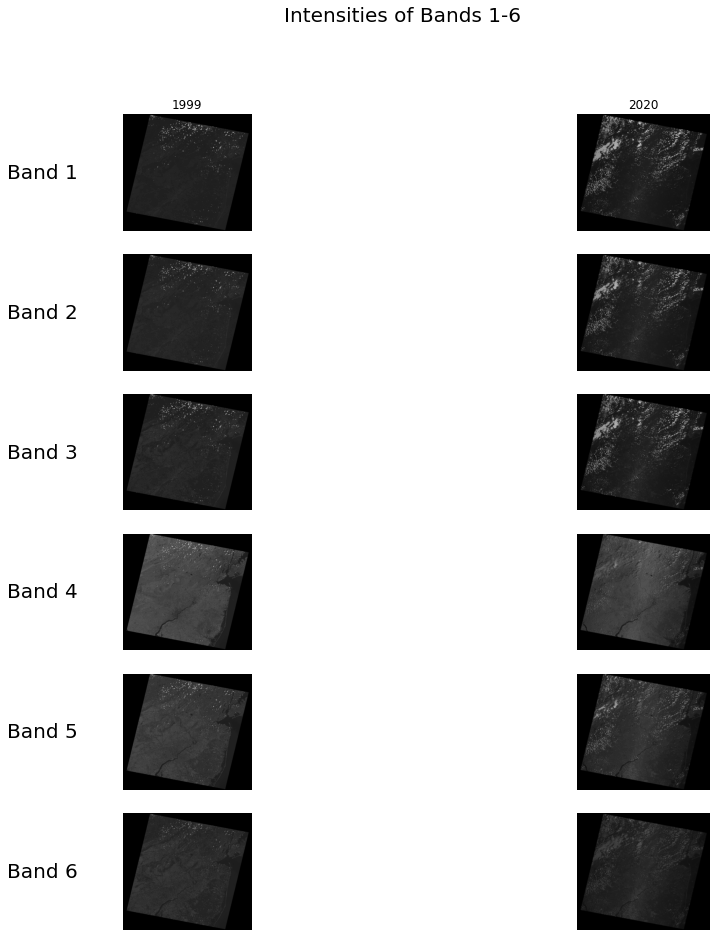

In [4]:
cols = ['1999', '2020']
rows = ['Band {}'.format(row) for row in range(1, 7)]

fig,axes = plt.subplots(6,2,figsize=(15,15))
fig.suptitle('Intensities of Bands 1-6', fontsize=20)

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, (0, 0.5), xytext=(-45, 0), ha='right', va='center',
                size=20, rotation=0, xycoords='axes fraction',
                textcoords='offset points')
    
for i in range(n_bands):
    axes[i,0].imshow(NJ_img1999[:,:,i], cmap='gray')
    axes[i,0].axis('off')
    axes[i,1].imshow(NJ_img2020[:,:,i], cmap='gray')
    axes[i,1].axis('off')

Next, we will standardize our data, which is currently expressed as a (877, 968, 6) array. We will do this by flattening the array as well as subtracting the mean and then dividing standard deviation.

In [5]:
NJ_matrix1999 = np.zeros((NJ_img1999[:,:,0].size,n_bands))
NJ_matrix2020 = np.zeros((NJ_img2020[:,:,0].size,n_bands))
for i in range(n_bands):
    
    NJ_array1999 = NJ_img1999[:,:,i].flatten()
    NJ_stnd_1999 = (NJ_array1999 - NJ_array1999.mean())/NJ_array1999.std()  # Standardize each variable 
    NJ_matrix1999[:,i] = NJ_stnd_1999

    NJ_array2020 = NJ_img2020[:,:,i].flatten()
    NJ_stnd_2020 = (NJ_array2020 - NJ_array2020.mean())/NJ_array2020.std()  # Standardize each variable 
    NJ_matrix2020[:,i] = NJ_stnd_2020

The two main steps of PCA are computing the covariance matrices and eigenvalues/vectors of this matrix. 

In [6]:
#Covariance Matrix
cov1999 = np.cov(NJ_matrix1999.transpose())
cov2020 = np.cov(NJ_matrix2020.transpose())

# Eigenvalues, eigenvectors
evals1999, evecs1999 = np.linalg.eig(cov1999)
evals2020, evecs2020 = np.linalg.eig(cov2020)

print("1999 Image Eigenvalues:\n\n", evals1999,"\n")
print("2020 Image Eigenvalues:\n\n", evals2020,"\n")

1999 Image Eigenvalues:

 [5.6777684454126627e+00 2.2545783805048011e-01 7.5140777797425076e-02
 4.1476748171877060e-03 6.1343589295637380e-03 1.1357972671612048e-02] 

2020 Image Eigenvalues:

 [5.4096666769867765e+00 4.7685497031085922e-01 4.5715171910450884e-03
 1.6795502411507644e-02 4.1097256145806331e-02 5.1021386334501873e-02] 



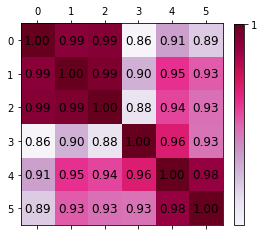

In [7]:
img = plt.matshow(cov1999, cmap=plt.cm.PuRd)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov1999.shape[0]):
    for y in range(cov1999.shape[1]):
        plt.text(x, y, "%0.2f" % cov1999[x,y], size=12, color='black', ha="center", va="center")
        
plt.show()

The next step is to actually compute the principal components. We will then validate this from-scratch implementation against the scikitlearn PCA method.

In [8]:
# Ordering Eigenvalues and Eigenvectors
order1 = evals1999.argsort()[::-1]
evals1999 = evals1999[order1]
evecs1999 = evecs1999[:,order1]

order2 = evals2020.argsort()[::-1]
evals2020 = evals2020[order2]
evecs2020 = evecs2020[:,order2]

# Projection of standardized data on e-vecs yields Principal Components 
PC_1999 = np.matmul(NJ_matrix1999, evecs1999)
PC_2020 = np.matmul(NJ_matrix2020, evecs2020)

In [9]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

pca = decomposition.PCA(n_components=3)
test_std = StandardScaler().fit_transform(NJ_matrix1999)
sk_pca = (pca.fit_transform(test_std) * (-1))[:3]
first_3_pc = PC_1999[:,:3][:3]

# For clarity, only using first 3 elements of PCA matrices
print('My Implementation:')
print(first_3_pc)
print('---------------------------------------')
print('Scikitlearn Implementation:')
print(sk_pca)

np.testing.assert_allclose(first_3_pc, sk_pca)
print('Success!')

My Implementation:
[[ 2.9391113122692847 -0.1858123901268706  0.0177923641375138]
 [ 2.9391113122692847 -0.1858123901268706  0.0177923641375138]
 [ 2.9391113122692847 -0.1858123901268706  0.0177923641375138]]
---------------------------------------
Scikitlearn Implementation:
[[ 2.9391113122704913 -0.185812390123548   0.0177923641390751]
 [ 2.9391113122701973 -0.1858123901256614  0.0177923641373895]
 [ 2.9391113122701973 -0.1858123901257131  0.0177923641376674]]
Success!


How well does PCA capture the original variance of the input data? We can look at how well the variance is reflected in the principal components. (I used the colors of the year for 1999 and 2020 here!) Clearly, we see that the majority of information is captured in the first 3 components. 

1999: First three PCs retain 99% of information
2020: First three PCs retain 98% of information


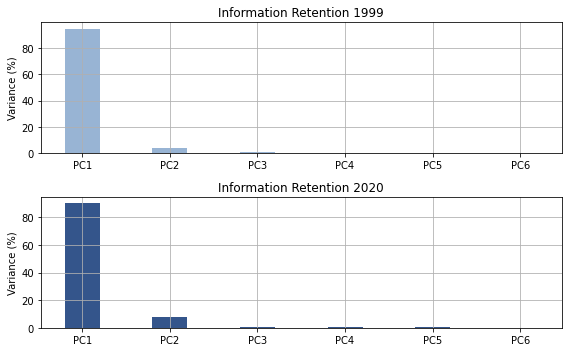

In [10]:
#Information Retained by Principal Components
fig = plt.figure(figsize=(8, 5))

axes = fig.add_subplot(2, 1, 1)
axes.grid()
plt.bar([1,2,3,4,5,6],evals1999/sum(evals1999)*100,align='center',width=0.4,tick_label = ['PC1','PC2','PC3','PC4','PC5','PC6'], color = '#98b4d4')
axes.set_ylabel('Variance (%)')
plt.title('Information Retention 1999')
plt.tight_layout()

print("1999: First three PCs retain " + str(int(sum(evals1999[:3])/sum(evals1999)*100))+"% of information")

axes = fig.add_subplot(2, 1, 2)
axes.grid()
plt.bar([1,2,3,4,5,6],evals2020/sum(evals2020)*100,align='center',width=0.4,tick_label = ['PC1','PC2','PC3','PC4','PC5','PC6'], color = '#34558b')
axes.set_ylabel('Variance (%)')
plt.title('Information Retention 2020')
plt.tight_layout()

print("2020: First three PCs retain " + str(int(sum(evals2020[:3])/sum(evals2020)*100))+"% of information")

Finally, we will convert our PCA matrices back into 2-d arrays so that we can see how the reconstructed images compare to the original False Color image from the bands. 

In [11]:
PC_2d_1999 = np.zeros((img_shape1[0], img_shape1[1], n_bands))
PC_2d_2020 = np.zeros((img_shape2[0], img_shape2[1], n_bands))
for i in range(n_bands):
    PC_2d_1999[:,:,i] = PC_1999[:,i].reshape(-1, img_shape1[1])
    PC_2d_2020[:,:,i] = PC_2020[:,i].reshape(-1, img_shape2[1])

PC_2d_Norm_1999 = np.zeros((img_shape1[0], img_shape1[1], n_bands))
PC_2d_Norm_2020 = np.zeros((img_shape2[0], img_shape2[1], n_bands))
for i in range(n_bands):
    PC_2d_Norm_1999[:,:,i] = cv2.normalize(PC_2d_1999[:,:,i], np.zeros(img_shape1), 0, 255, cv2.NORM_MINMAX)
    PC_2d_Norm_2020[:,:,i] = cv2.normalize(PC_2d_2020[:,:,i], np.zeros(img_shape2), 0, 255, cv2.NORM_MINMAX)

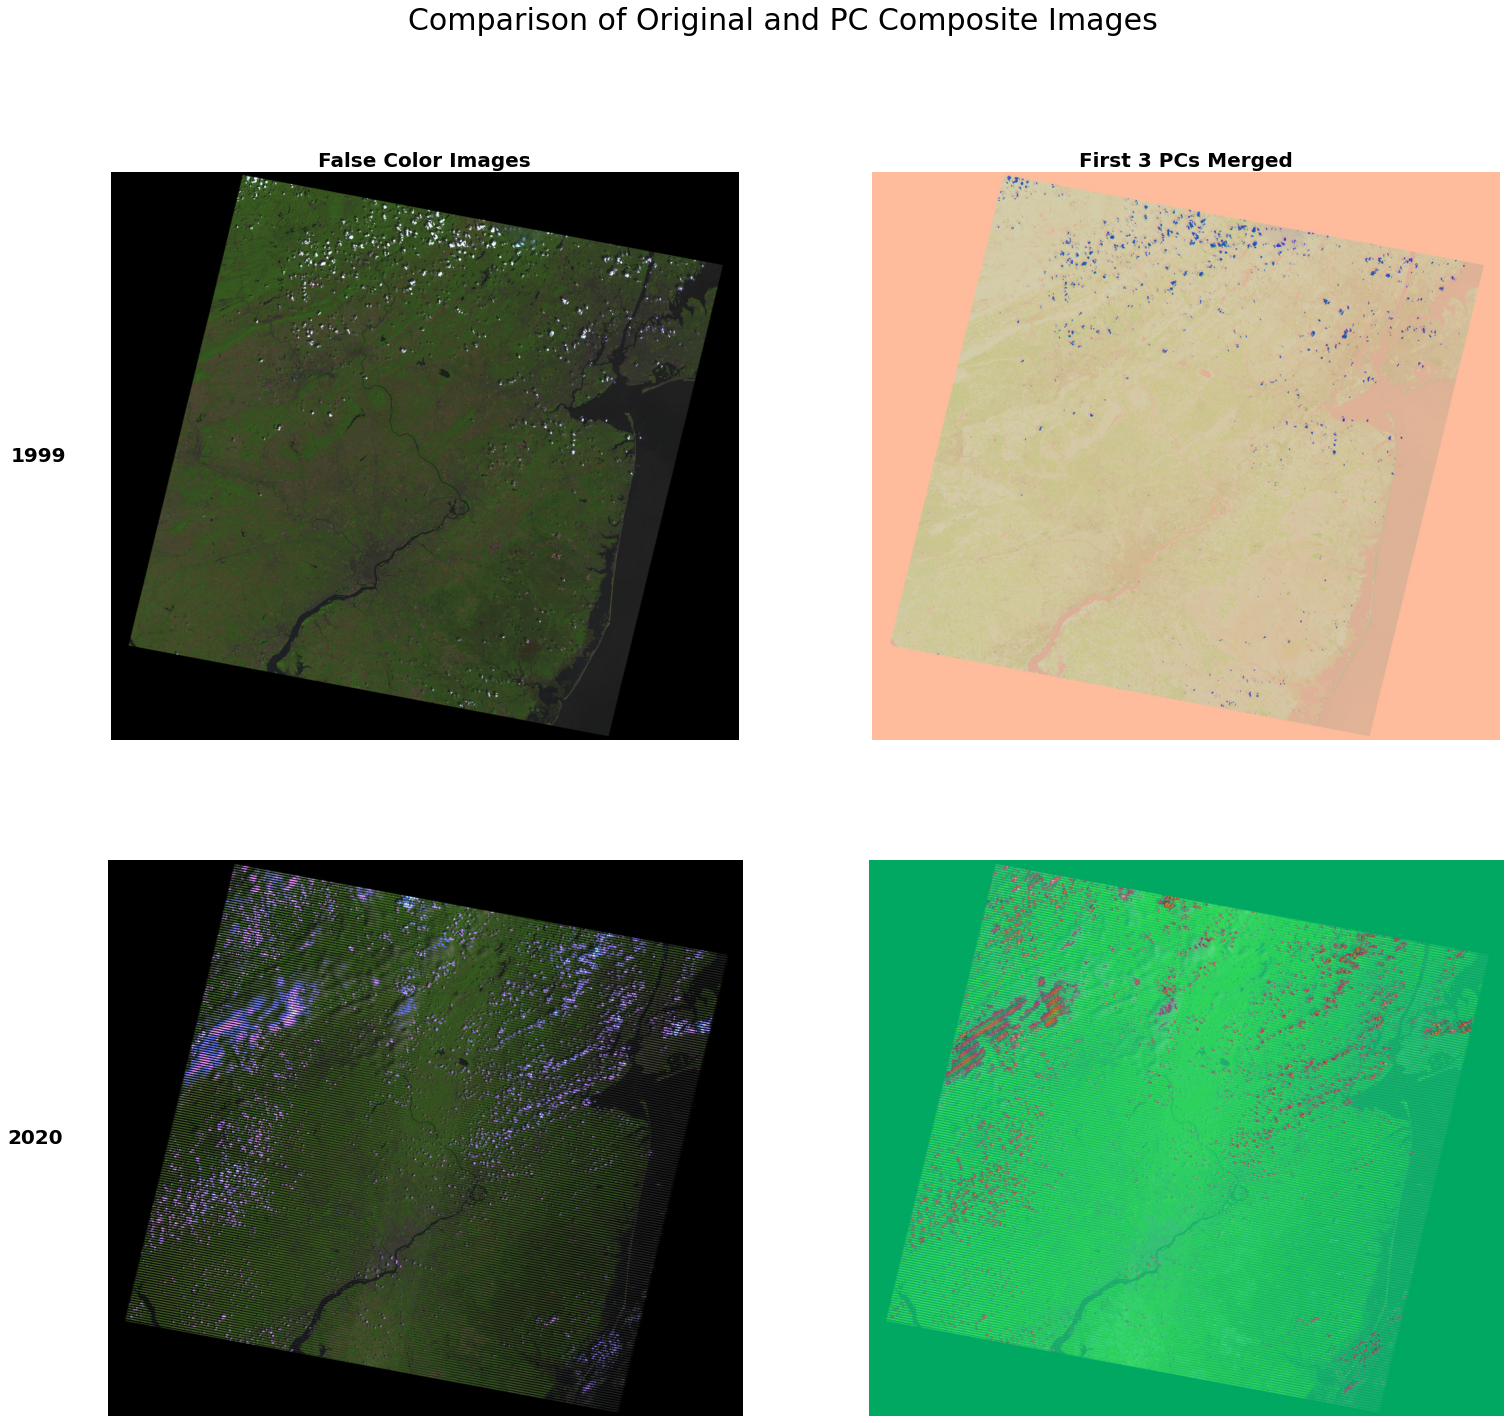

In [12]:
fig,axes = plt.subplots(2,2,figsize=(25,23))
fig.suptitle('Comparison of Original and PC Composite Images', fontsize=30)

axes[0,0].imshow(img1)
axes[0,0].axis('off')
axes[0,1].imshow(PC_2d_Norm_1999[:,:,:3].astype(int))
axes[0,1].axis('off')

axes[1,0].imshow(img2)
axes[1,0].axis('off')
axes[1,1].imshow(PC_2d_Norm_2020[:,:,:3].astype(int))
axes[1,1].axis('off')

cols = ['False Color Images', 'First 3 PCs Merged']
rows = ['1999', '2020']

for ax, col in zip(axes[0], cols):
    ax.set_title(col, fontsize = 20, fontweight = 'bold')

for ax, row in zip(axes[:,0], rows):
    ax.annotate(row, (0, 0.5), xytext=(-45, 0), ha='right', va='center',
                size=20, rotation=0, xycoords='axes fraction',
                textcoords='offset points', fontweight = 'bold')

## Discussion [10 pts]

Discuss the results of your code including
* Why do you believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you would do differently next time


I think that while the PCA method employed here resolved correctly, the project did not ultimately work because the input images were not zoomed in enough to capture the features in a workable capacity. What I mean by this is that since I was seeking to explore the expansion of urban sprawl in the last 2 decades, I should have used satellite data that captured features at the house and building level, rather than broadly reflecting agricultural land use. However, an important takeaway here is that PCA can be used for a variety of tasks in environmental science, particularly in image processing. Other similar research has used these techniques to quantify damage done by wildfires and reduction of wetlands. The success of these projects is highly contingent on the quality of input data. 
$\newline$
Next steps could include, given better input data, doing computational visual analysis of the PCA reconstructed images to determine the degree of industrial/residential development. If the reconstructed images, for example, had distinct zones that were color coded, the percentage cover could give an indication of the degree of urban sprawl. 